# Data Analysis of Rent using Matplotlib - M00977896

In [154]:
# Importing the librabries for visuals
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import altair as alt

alt.data_transformers.disable_max_rows() # maximum number of rows restriction

#Loading the dataof rent for data analysis
df_r_eda = pd.read_csv("rent_eda.csv")


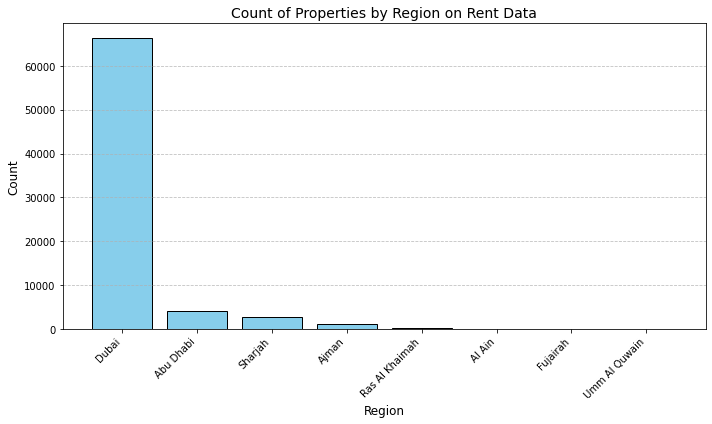

In [155]:
#count the number of properties by each region
region_counts = df_r_eda['Region'].value_counts()

#Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(region_counts.index, region_counts.values, color='skyblue', edgecolor='k')
plt.title('Count of Properties by Region on Rent Data', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)

#Rotate x-axis labels 
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


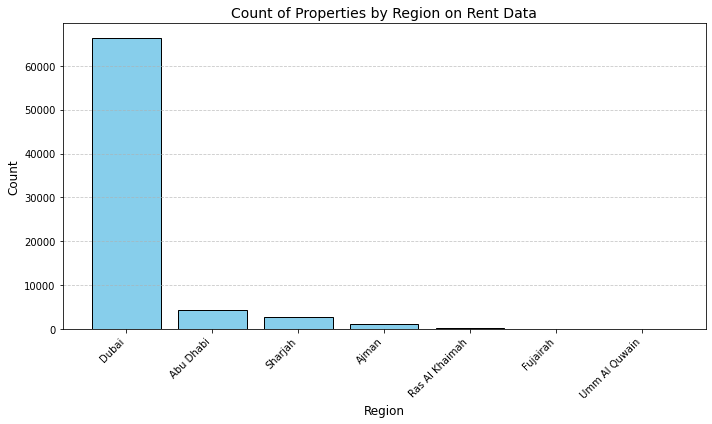

In [156]:
# there are 7 emirates but al ain is the part of Abu Adhabi
df_r_eda['Region'] = df_r_eda['Region'].replace('Al Ain', 'Abu Dhabi')
# Count the number of properties by region
region_counts = df_r_eda['Region'].value_counts()

#Plotting the bar chart RENT data
plt.figure(figsize=(10, 6))
plt.bar(region_counts.index, region_counts.values, color='skyblue', edgecolor='k')
plt.title('Count of Properties by Region on Rent Data', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


There are 7 emirated but shown 8, one emirates belongs to abu dhabi emiarte so converting it and making 7 emirates

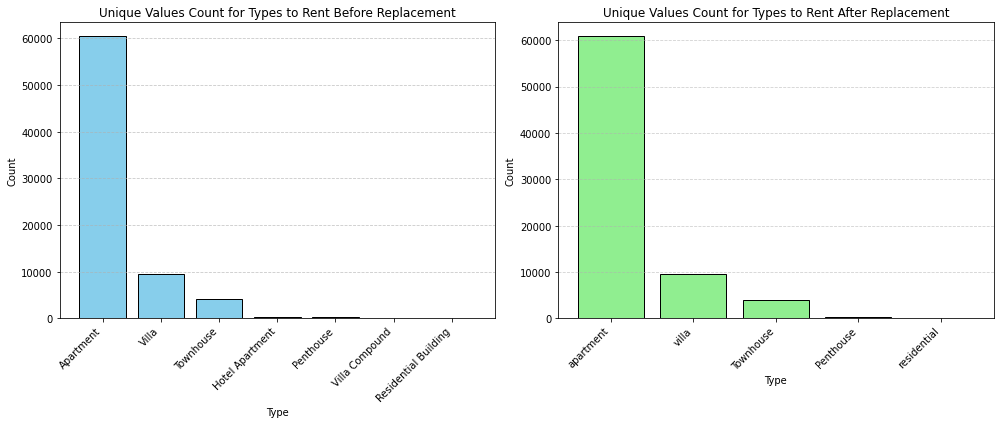

In [157]:
# Count the types for rent before replacement
value_counts_r_before = df_r_eda['type'].value_counts()
value_counts_df_r_before = value_counts_r_before.reset_index()
value_counts_df_r_before.columns = ['type', 'Count']

#plotting the bar chart for 'before replacement'
plt.figure(figsize=(14, 6))

#before replacement chart
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.bar(value_counts_df_r_before['type'], value_counts_df_r_before['Count'], color='skyblue', edgecolor='k')
plt.title('Unique Values Count for Types to Rent Before Replacement', fontsize=12)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#perform grouping 
replacement_mapping = {
    'Apartment': 'apartment',
    'Hotel Apartment': 'apartment',
    'Penthouse': 'Penthouse',
    'Residential Building': 'residential',
    'Residential Plot': 'residential',
    'Residential Floor': 'residential',
    'Townhouse': 'Townhouse',
    'Villa': 'villa',
    'Villa Compound': 'villa'
}
df_r_eda['type'] = df_r_eda['type'].replace(replacement_mapping)

# Count the types for rent after replacement
value_counts_r_after = df_r_eda['type'].value_counts()
value_counts_df_r_after = value_counts_r_after.reset_index()
value_counts_df_r_after.columns = ['type', 'Count']

# After replacement chart
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.bar(value_counts_df_r_after['type'], value_counts_df_r_after['Count'], color='lightgreen', edgecolor='k')
plt.title('Unique Values Count for Types to Rent After Replacement', fontsize=12)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


This picture has two bar graphs showing the unique value counts for the rental property types before and after a replace operation. In the left graph, "Unique Values Count for Types to Rent (Before Replacement)", "Apartment" is leading by a big margin of about 60,000 listings, with other types such as "Villa" and "Townhouse" at really low counts. The right chart, "Unique Values Count for Types to Rent - After Replacement," indeed shows slight changes, especially an increase in count for the category "Residential." That could mean that as a result of the replacement operation, some of the property types have been standardized or collapsed to a single type. Overall, the charts capture a general change in property type distribution arising from data preprocessing.

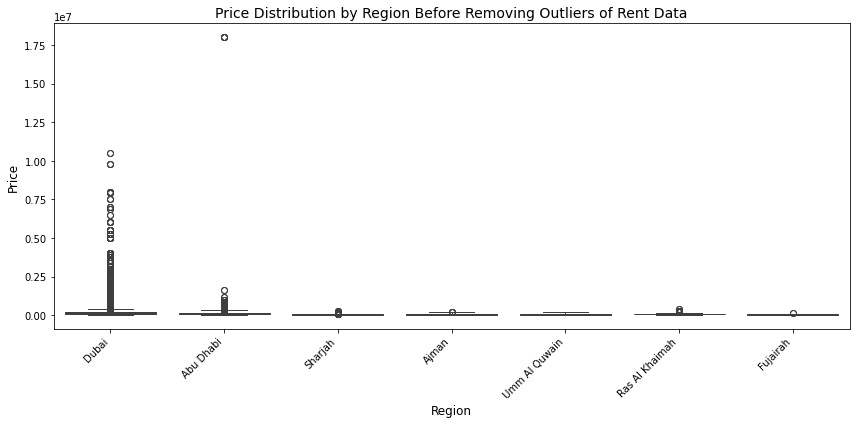

In [158]:
plt.figure(figsize=(12, 6))

# Create the boxplot using Seaborn
sns.boxplot(x='Region', y='price', data=df_r_eda)
plt.title('Price Distribution by Region Before Removing Outliers of Rent Data', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This box plot shows the distribution of price by region in rental data. Dubai has the highest median price and Abu Dhabi and Ras Al Khaimah follow next, while Ajman has the lowest median price. From these boxplots, the dispersion of prices for Dubai, Abu Dhabi, and Ras Al Khaimah is larger compared to other regions. That shows that there is a greater dispersion in these regions for rental prices.


<ipython-input-159-19882469c9a2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='price', data=df_r_eda_filtered, palette='viridis')


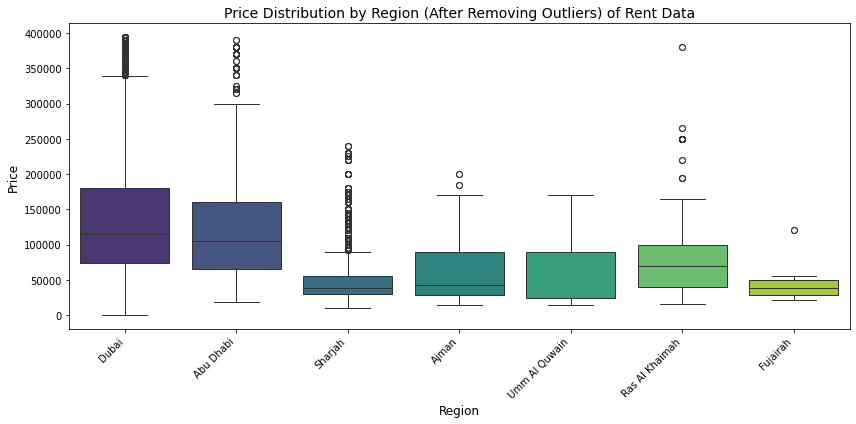

In [159]:
# Calculate the IQR for 'price' column for rent data
Q1 = df_r_eda['price'].quantile(0.25)
Q3 = df_r_eda['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_r_eda_filtered = df_r_eda[(df_r_eda['price'] >= lower_bound) & (df_r_eda['price'] <= upper_bound)]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the boxplot using Seaborn
sns.boxplot(x='Region', y='price', data=df_r_eda_filtered, palette='viridis')
plt.title('Price Distribution by Region (After Removing Outliers) of Rent Data', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


This boxplot describes the distribution of price by region for rental data after the removal of outliers. The regions with the highest median prices are Dubai, Abu Dhabi, and Sharjah. On the other extreme, Ajman is the region with the lowest median price. In fact, the boxplots show that the prices in Dubai, Abu Dhabi, and Sharjah are far more dispersed compared to any of the remaining regions. This therefore, means that the variation of rental price is higher in the regions.

# Category Analysis

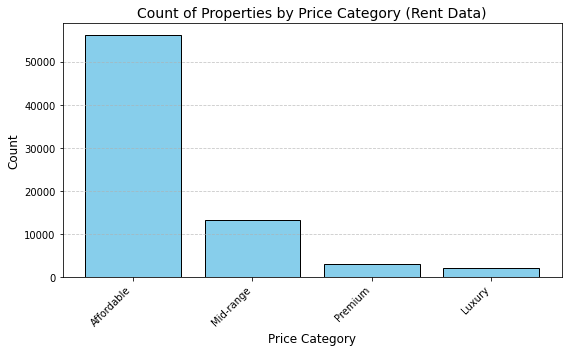

In [160]:
#counting the number of properties by price category 
price_category_counts = df_r_eda['price_category'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(price_category_counts.index, price_category_counts.values, color='skyblue', edgecolor='k')
#Visualizing 
plt.title('Count of Properties by Price Category (Rent Data)', fontsize=14)
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart shows the count of properties in Abu Dhabi by price category. The most common price category is "Affordable," followed by "Mid-range," "Premium," and "Luxury." and afforable is having the highest count among all.

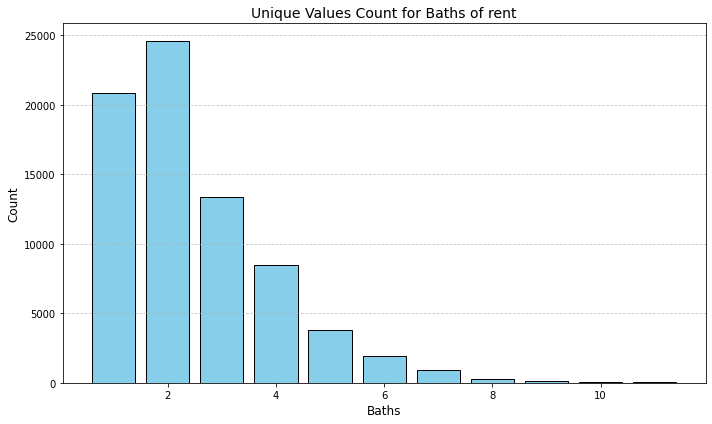

In [161]:
#Counting thenumber of baths in rent
#Counting the occurrences of each unique value in the 'baths' column
value_counts = df_r_eda['baths'].value_counts()
#Visualizing
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='k')

# Adding titles
plt.title('Unique Values Count for Baths of rent', fontsize=14)
plt.xlabel('Baths', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This is a bar chart showing the distribution of properties in Abu Dhabi by a number of bathrooms. The most frequent distribution of properties is for those with 2 bathrooms, followed by 3, 4, and 5 bathrooms. From this chart, it follows that the higher the amount of bathrooms in property, the lesser is the number of such properties.



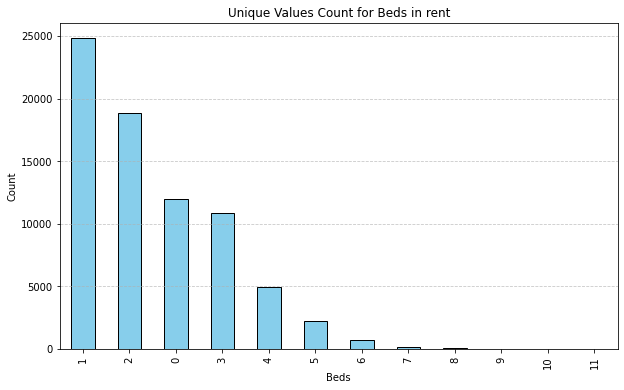

In [162]:
# Bar chart of count of beds rent
beds_counts = df_r_eda['beds'].value_counts()
#Visualizing
plt.figure(figsize=(10, 6))
beds_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Unique Values Count for Beds in rent')
plt.xlabel('Beds')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart below shows the count of properties in Abu Dhabi by a number of bedrooms. Most of the properties have 1 bedroom, followed by 2, 3, and 4. In general, the higher the number of bedrooms, the fewer the number of properties.

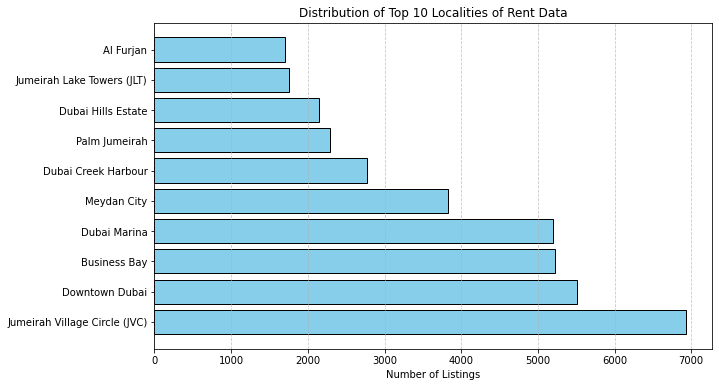

In [163]:
#top 10 locality of rent data
# Calculate the count of listings per locality
locality_distribution = df_r_eda['Locality'].value_counts().reset_index()
locality_distribution.columns = ['Locality', 'count']
top_localities = locality_distribution.head(10)
#Visualizing
# Horizontal bar chart for distribution of top localities
plt.figure(figsize=(10, 6))
plt.barh(top_localities['Locality'], top_localities['count'], color='skyblue', edgecolor='k')
plt.xlabel('Number of Listings')
plt.title('Distribution of Top 10 Localities of Rent Data')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


This above bar chart tells the distribution of top 10 localities for rent data in Dubai. The highest listings are recorded for Jumeirah Village Circle, followed by Downtown Dubai, Business Bay, and Dubai Marina. Al Furjan still remains at the bottom of the top 10 localities.


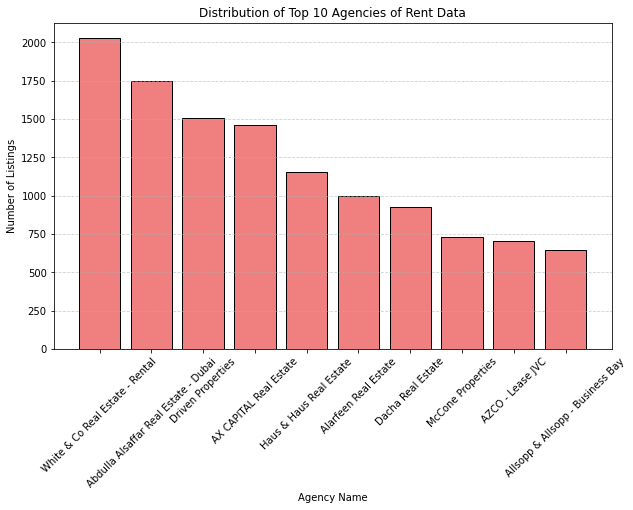

In [164]:
#Top 10 agencies of rent data 
#calculating the count of listings per agency
agency_distribution = df_r_eda['agency_name'].value_counts().reset_index()
agency_distribution.columns = ['Agency Name', 'count']
#Visualizing
# Limit to top 10 agencies
top_agencies = agency_distribution.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_agencies['Agency Name'], top_agencies['count'], color='lightcoral', edgecolor='k')
plt.title('Distribution of Top 10 Agencies of Rent Data')
plt.xlabel('Agency Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Above is the bar chart distribution of the top 10 agencies in the rent data of Dubai. Accordingly, the most popular agencies are: White & Co Real Estate - Rental, Abdulla Alsaffar Real Estate - Dubai, and Driven Properties. On the contrary, the least popular agency in the top 10 is Allsopp & Allsopp - Business Bay.

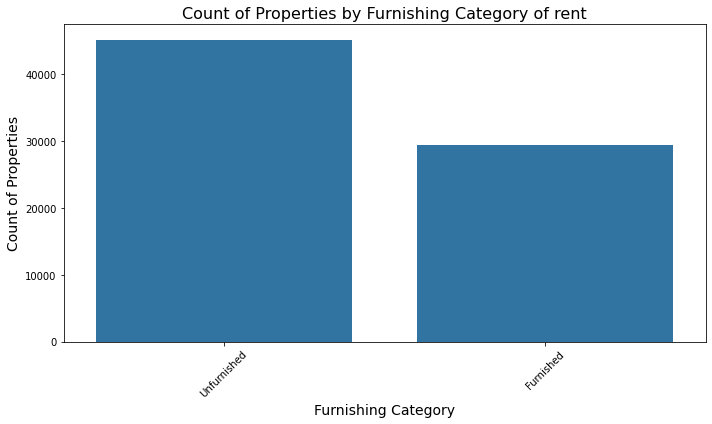

In [165]:
# Count the occurrences of each furnishing category
furnishing_count = df_r_eda['furnishing'].value_counts().reset_index()
furnishing_count.columns = ['Furnishing', 'Count']
#Visualizing
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Furnishing', y='Count', data=furnishing_count)
plt.title('Count of Properties by Furnishing Category of rent', fontsize=16)
plt.xlabel('Furnishing Category', fontsize=14)
plt.ylabel('Count of Properties', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


The bar chart shows the count of properties in UAE by furnishing category. The most common furnishing category is "Unfurnished," around 45k followed by "Furnished which is 30k." 

# Data Analysis on Price Rent

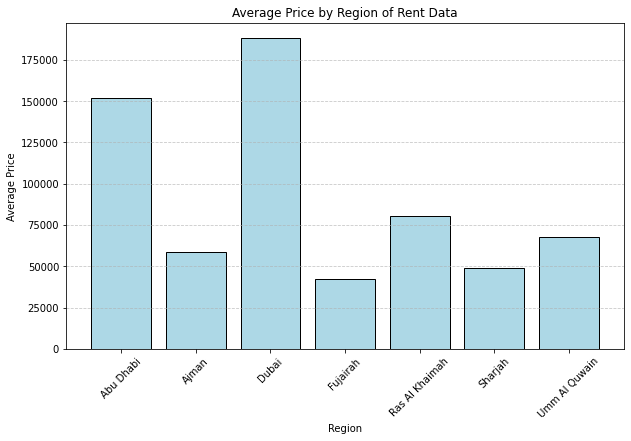

In [166]:
# Bar chart of average price by region
average_price_by_region = df_r_eda.groupby('Region')['price'].mean().reset_index()
#Visualizing
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_region['Region'], average_price_by_region['price'], color='lightblue', edgecolor='k')
plt.title('Average Price by Region of Rent Data')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


It is highest in Dubai because it is the highest in demand, being the major business and tourism hub. Other relatively high averages are recorded in Abu Dhabi and Ras Al Khaimah due to their proximities to Dubai, signaling close economic development. Ajman, being the smallest of all emirates, has the lowest average price, likely due to a factor of lower demand for its properties.

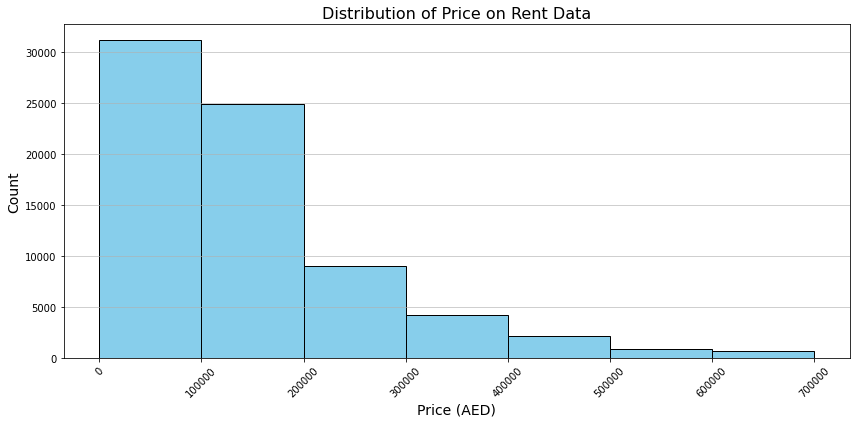

In [167]:

# Create a histogram for the 'price' column with appropriate bins
plt.figure(figsize=(12, 6))

# Define bins based on the range of price values
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]

plt.hist(df_r_eda['price'].dropna(), bins=bins, color='skyblue', edgecolor='black')
#Visualizing
# Adding titles and labels
plt.title('Distribution of Price on Rent Data', fontsize=16)
plt.xlabel('Price (AED)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(bins, rotation=45)  # This will display the bin edges on the x-axis
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.tight_layout()
plt.show()


As might be expected, the majority of rented properties fall within a range from 0 to 300,000 AED. This indicates that Abu Dhabi has a somewhat affordable rental market and more open possibilities for lower prices. On the other extreme, a small number of properties are offered for higher prices, which suggests there is also a market for expensive rentals in Abu Dhabi.This aggregated histogram of the distribution of UAE rental price appears to be right-skewed, indicating that more properties are available at cheaper prices. 

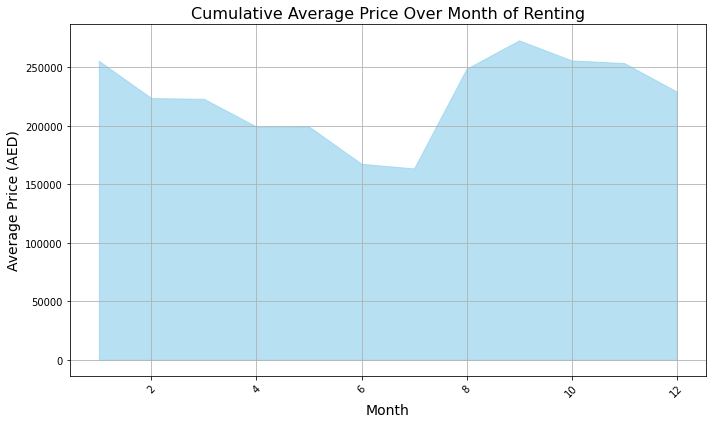

In [168]:
# Create an area plot
plt.figure(figsize=(10, 6))
monthly_avg_price = df_r_eda.groupby('month')['price'].mean().reset_index()
plt.fill_between(monthly_avg_price['month'], monthly_avg_price['price'], color='skyblue', alpha=0.6)

# Adding titles and labels
plt.title('Cumulative Average Price Over Month of Renting', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price (AED)', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


The above is a line chart that reflects the trend of the cumulative average price for properties in the United Arab Emirates over the months. The average price in January stands high; in February and March, it goes down a little; in April, again, it increases. The rest of the year is almost balanced with slight increases in November and December. In sum, the trend of the UAE's cumulative average price of properties is relatively stable in most parts of the year, with a slight increase during the winter months. 

# Time series analysis on Renting

In [169]:
#ensure 'post_date' is in datetime format
df_r_eda['post_date'] = pd.to_datetime(df_r_eda['post_date'])

#extracting year & quarter for grouping and convert to string format
df_r_eda['year_quarter'] = df_r_eda['post_date'].dt.to_period('Q').astype(str)

#calculate count of listings per quarter
quarterly_listing_count = df_r_eda.groupby('year_quarter')['Locality'].count().reset_index()
quarterly_listing_count.rename(columns={'Locality': 'count'}, inplace=True)

#Visualizing Line chart for quarterly count of listings
line_quarterly_count = alt.Chart(quarterly_listing_count).mark_line(point=True).encode(
    x=alt.X('year_quarter:O', title='Quarter'),
    y=alt.Y('count:Q', title='Number of Listings'),
    tooltip=['year_quarter', 'count']
).properties(
    width=600,
    height=400,
    title='Quarterly Count of Listings of rent data'
).interactive()

line_quarterly_count


alt.Chart(...)

In [170]:
#goup data by year and calculate average price
yearly_data = df_r_eda.groupby('year', as_index=False)['price'].mean()

# Create a line chart for average price over years
line_yearly_price = alt.Chart(yearly_data).mark_line(point=True).encode(
    x=alt.X('year:O', title='Year'),
    y=alt.Y('price:Q', title='Average Price (AED)'),
    tooltip=['year', 'price']
).properties(
    width=600,
    height=200,
    title='Average Price Over Years of rent data'
).interactive()

line_yearly_price

alt.Chart(...)

This is the line chart of the average renting price of the properties over the years, starting from 2020 to 2024. It increased from 2020 to 2023, having its peak in 2023, while in 2024, the average price decreased slightly.

# Analysis on area chart

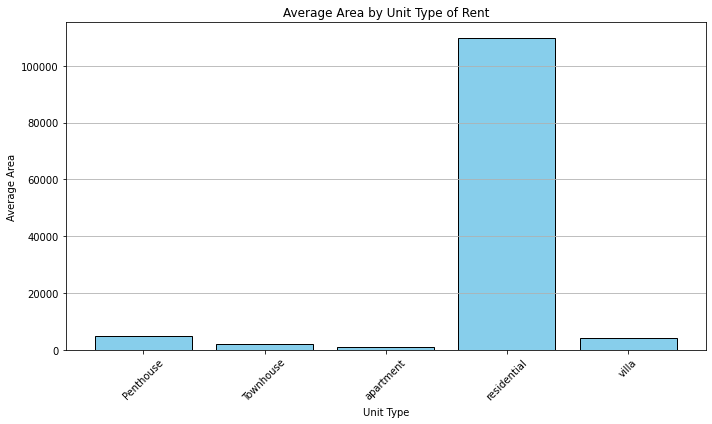

In [171]:
#calculating the average area by unit type 
avg_area_by_type_r = df_r_eda.groupby('type')['area'].mean().reset_index(name='avg_area')
#Visualizing avg area by types
plt.figure(figsize=(10, 6))
plt.bar(avg_area_by_type_r['type'], avg_area_by_type_r['avg_area'], color='skyblue', edgecolor='black')
plt.title('Average Area by Unit Type of Rent')
plt.xlabel('Unit Type')
plt.ylabel('Average Area')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The following bar chart represents the average area for various types of units in UAE: among them, residential has the highest average area, followed by penthouse, townhouse, villa, and apartment.

# Thank you